In [118]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [119]:
import joblib
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
new_data1 = joblib.load('new_data1.joblib')
new_data1.head(3)

BuildingType PrimaryPropertyType Neighborhood  Latitude  Longitude  \
0  NonResidential               Hotel     downtown  47.61220 -122.33799   
1  NonResidential               Hotel     downtown  47.61317 -122.33393   
2  NonResidential               Hotel     downtown  47.61393 -122.33810   

   YearBuilt  NumberofBuildings  NumberofFloors  PropertyGFATotal  \
0       1927                1.0              12             88434   
1       1996                1.0              11            103566   
2       1969                1.0              41            956110   

   SiteEnergyUse(kBtu)  SteamUse(kBtu)  Electricity(kBtu)  NaturalGas(kBtu)  \
0            7226362.5       2003882.0          3946027.0         1276453.0   
1            8387933.0             0.0          3242851.0         5145082.0   
2           72587024.0      21566554.0         49526664.0         1493800.0   

   TotalGHGEmissions  
0             249.98  
1             295.86  
2            2089.28

In [120]:
# one-hot-encoding
def get_ohe(df, column_name):
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(df[[column_name]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[column_name]]), columns=ohe.get_feature_names_out())
    df.drop(columns=[column_name], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

new_data1 = get_ohe(new_data1, 'BuildingType')
new_data1 = get_ohe(new_data1, 'PrimaryPropertyType')
new_data1 = get_ohe(new_data1, 'Neighborhood')

In [121]:
new_data1.shape

(1666, 51)

## Site Energy Use(kBtu)

In [122]:

y = new_data1[['SiteEnergyUse(kBtu)']]
X = new_data1.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25)


In [123]:

#lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
#lr.fit(X_train, y_train)

In [124]:
#

#y_true = y_test
#y_pred = lr.predict(X_test)
#mean_absolute_error(y_true, y_pred)
#print(mean_absolute_error(y_true, y_pred), r2_score(y_test,y_pred))
#print(mean_squared_error(y_true, y_pred), mean_absolute_percentage_error(y_test,y_pred))

### Dummy regressor

In [125]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn.dummy import DummyRegressor
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
lm_dummy_mean.score(X_train, y_train)
y_predict = lm_dummy_mean.predict(X_test)
print(mean_absolute_error(y_test, y_predict), r2_score(y_test,y_predict))
print(mean_squared_error(y_test, y_predict), mean_absolute_percentage_error(y_test,y_predict))

9216464.230854338 -0.0004323373409762521
560989776030565.94 7.396854114739867e+20


### Ridge

In [126]:
# define model
model = Ridge()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score 
print(mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred), mean_absolute_percentage_error(y_test,y_pred))

4868112.086029232 0.731356847195612
150640934422848.2 2.0357617007867288e+20


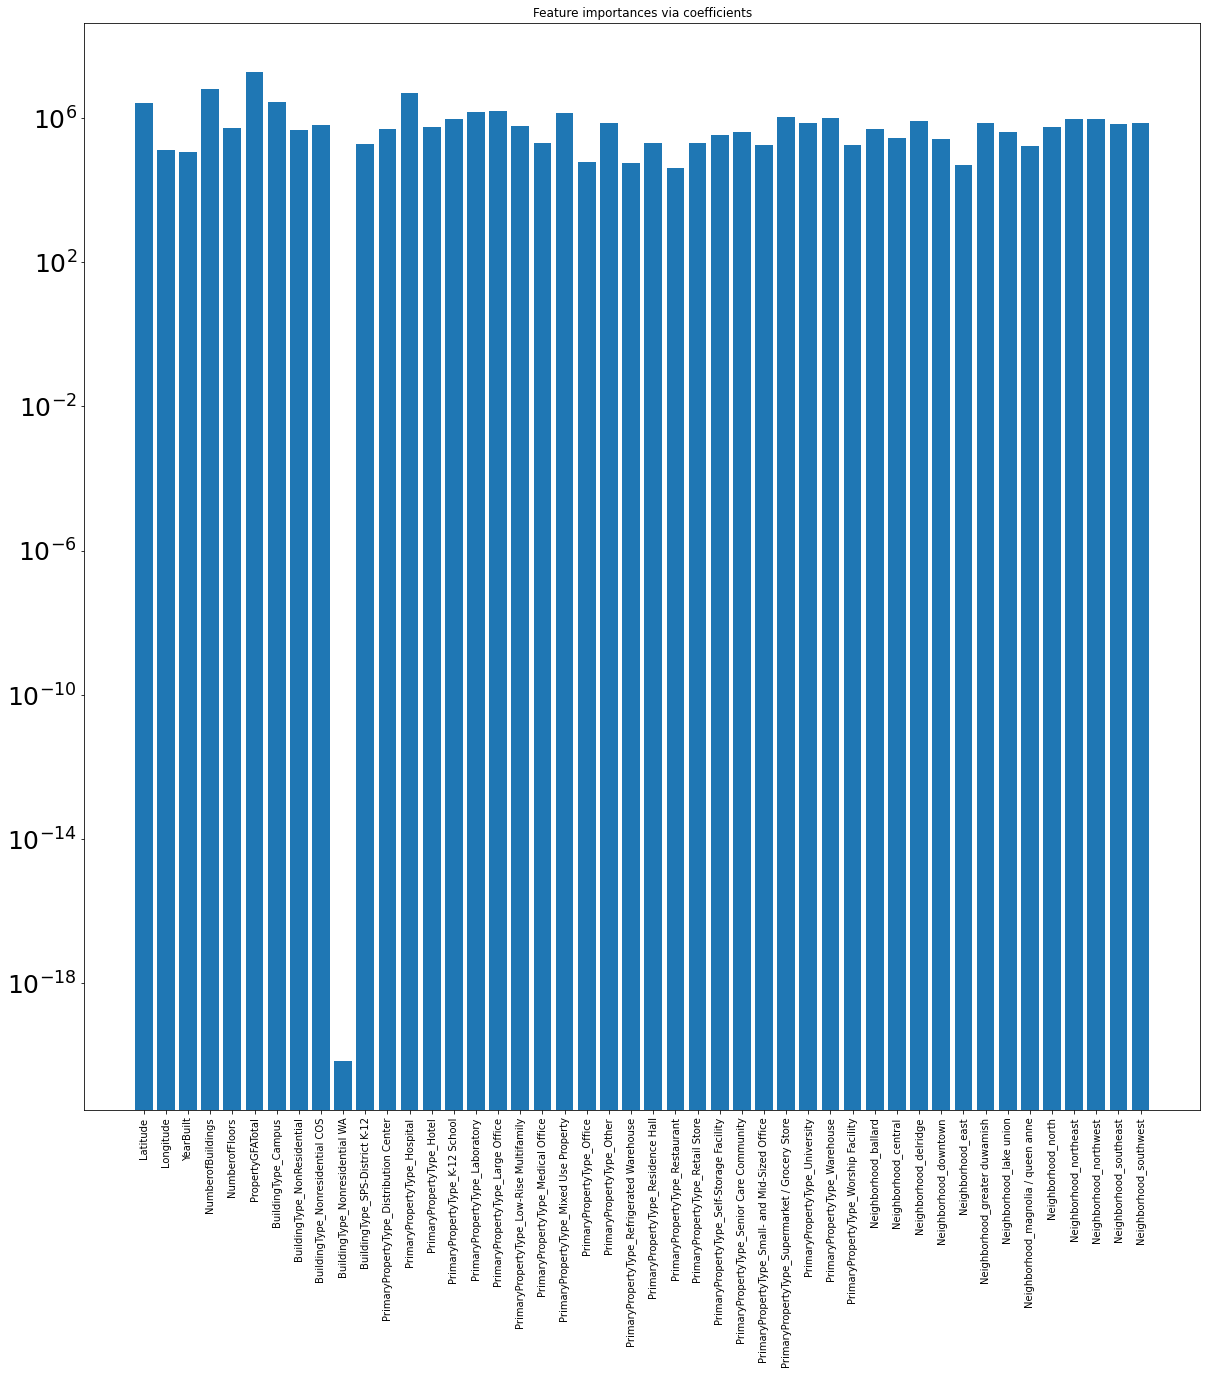

In [127]:
# feature importance
plt.figure(figsize=(20,20))
plt.yscale('log')
plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize=25 
)
plt.xticks(
        rotation=90, 
        fontweight='light',
        fontsize=10
)

importance = np.abs(model.coef_[0])
feature_names = np.array(X.columns)
# import seaborn as sns
# sns.barplot(x=importance, y=feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()


In [128]:
param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [129]:
from sklearn import model_selection
cv = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
score = 'neg_mean_absolute_error'
#define model
model = Ridge()

# define search
search = model_selection.GridSearchCV(model, param, scoring=score, n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train)


/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce 

In [130]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -5598390.10705046
Best Hyperparameters: {'alpha': 0.01, 'fit_intercept': True, 'normalize': True, 'solver': 'saga'}


In [131]:
model_after = Ridge(alpha=0.01,fit_intercept= True, normalize = True, solver ='sag')
model_after.fit(X_train,y_train)
y_pred_after = model_after.predict(X_test)
print(mean_absolute_error(y_test,y_pred_after), r2_score(y_test,y_pred_after))
print(mean_squared_error(y_test,y_pred_after), mean_absolute_percentage_error(y_test,y_pred_after))

4793891.866732149 0.7287369652872648
152110026244586.47 2.013167726940213e+20


/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



##  Total GHG Emissions

In [132]:

y2 = new_data1[['TotalGHGEmissions']]
X2 = new_data1.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)
std_scale = preprocessing.StandardScaler().fit(X2)
X_std = std_scale.transform(X2)

X_train, X_test, y_train, y_test = train_test_split(X_std, y2, test_size=0.25)


In [133]:
# baseline DummyRegressor
lm_dummy_mean = DummyRegressor(strategy = 'mean').fit(X_train, y_train)
lm_dummy_mean.score(X_train, y_train)
y_predict2 = lm_dummy_mean.predict(X_test)
print(mean_absolute_error(y_test, y_predict2), r2_score(y_test,y_predict2))
print(mean_squared_error(y_test, y_predict2), mean_absolute_percentage_error(y_test,y_predict2))

215.41983161589224 -4.061849415037955e-06
485297.7991978689 1993916155278854.2


In [134]:
# define model
model2 = Ridge()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
from sklearn.metrics import mean_absolute_error,r2_score
print(mean_absolute_error(y_test,y_pred), r2_score(y_test,y_pred))

print(mean_squared_error(y_test,y_pred), mean_absolute_percentage_error(y_test,y_pred))

157.96715262737695 0.7268478342769179
132559.60643438346 2544007704574884.5


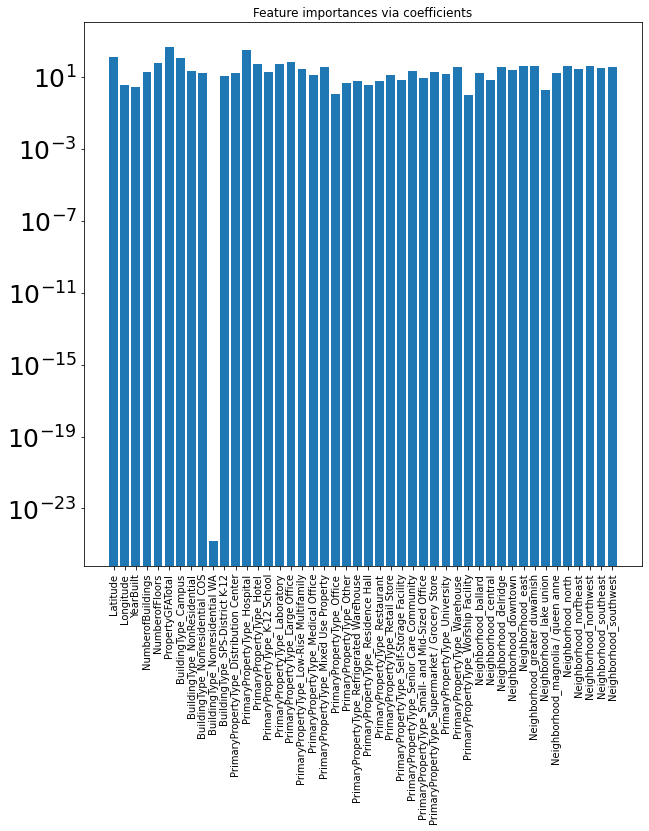

In [135]:
# feature importance
plt.figure(figsize=(10,10))
plt.yscale('log')
plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize=25 
)
plt.xticks(
        rotation=90, 
        fontweight='light',
        fontsize=10
)

importance = np.abs(model2.coef_[0])
feature_names = np.array(X2.columns)
# import seaborn as sns
# sns.barplot(x=importance, y=feature_names)
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients")
plt.show()

In [136]:
param = {
    'alpha':[.0001, 0.001,0.01, 0.01,1],
    'fit_intercept':[True,False],
    'normalize':[True,False],
'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
       }

In [137]:

cv = model_selection.RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
#define model
model = Ridge()
score ='neg_mean_absolute_error'
# define search
search = model_selection.GridSearchCV(model, param, scoring=score, n_jobs=-1, cv=cv)

# execute search
result = search.fit(X_train, y_train)


/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce 

In [138]:
print('Best Score: %s' % result.best_score_)
print('Best Hyperparameters: %s' % result.best_params_)

Best Score: -160.6657287437861
Best Hyperparameters: {'alpha': 1, 'fit_intercept': True, 'normalize': True, 'solver': 'sparse_cg'}


In [139]:
result.best_params_

{'alpha': 1, 'fit_intercept': True, 'normalize': True, 'solver': 'sparse_cg'}

In [140]:
model2_after = Ridge(alpha=1,fit_intercept= True, normalize = True, solver ='sparse_cg')
model2_after.fit(X_train,y_train)
y_pred_after = model2_after.predict(X_test)
print(mean_absolute_error(y_test,y_pred_after), r2_score(y_test,y_pred_after))
print(mean_squared_error(y_test,y_pred_after), mean_absolute_percentage_error(y_test, y_pred_after))

132.30552875699178 0.780394550818471
106573.60829370697 1769584715118030.2


/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning:

'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 



In [141]:
result.cv_results_['mean_fit_time']

array([0.01134546, 0.01698058, 0.01268417, 0.0211138 , 0.01783599,
       0.15229053, 0.2857048 , 0.00834908, 0.01776265, 0.01359576,
       0.02047424, 0.01922483, 0.0919982 , 0.16421103, 0.0195686 ,
       0.01712877, 0.0104023 , 0.02078116, 0.0132659 , 1.68192347,
       1.7999206 , 0.00682096, 0.01083424, 0.00687277, 0.01718675,
       0.0142445 , 1.27119122, 2.09732527, 0.00914946, 0.01336755,
       0.00948224, 0.01532632, 0.01409287, 0.09933937, 0.25476436,
       0.02145443, 0.02160706, 0.01224985, 0.02631697, 0.02007203,
       0.13608923, 0.18747378, 0.00841404, 0.01758132, 0.02395549,
       0.02461123, 0.01949037, 1.56556845, 1.69929396, 0.01040324,
       0.01456847, 0.01596571, 0.03413309, 0.0203206 , 1.46194863,
       2.37118361, 0.00888659, 0.01101911, 0.01087987, 0.01380514,
       0.03020308, 0.12420308, 0.24209233, 0.0068849 , 0.01185978,
       0.01076322, 0.01556936, 0.02734489, 0.15594982, 0.25114866,
       0.01147869, 0.01878828, 0.02270081, 0.03563575, 0.02828

In [142]:
result.cv_results_['mean_score_time']

array([0.00563004, 0.00426299, 0.0060948 , 0.00537113, 0.00662134,
       0.00554075, 0.00540774, 0.00514162, 0.00642788, 0.00553799,
       0.00397176, 0.01266921, 0.00849992, 0.00443592, 0.0150504 ,
       0.01793742, 0.00709534, 0.00543355, 0.00613201, 0.00515913,
       0.00461283, 0.00349333, 0.00469957, 0.00421112, 0.00426186,
       0.00420414, 0.00423877, 0.0043912 , 0.00413198, 0.00454748,
       0.00413158, 0.00608432, 0.00535724, 0.0045254 , 0.00989971,
       0.01622361, 0.0094865 , 0.00722388, 0.01057456, 0.00651448,
       0.00656859, 0.00401901, 0.00385694, 0.02467401, 0.00839478,
       0.0068061 , 0.00594782, 0.00418386, 0.00287121, 0.0083661 ,
       0.01654165, 0.00400294, 0.00785362, 0.00496426, 0.00276344,
       0.00420187, 0.00292098, 0.01201668, 0.00997988, 0.01376142,
       0.00647366, 0.00703606, 0.00957428, 0.008384  , 0.01077669,
       0.00444374, 0.00582926, 0.00840605, 0.00665971, 0.00435599,
       0.00694679, 0.00910676, 0.01446748, 0.00771209, 0.00661